In [20]:
!pip install pandas numpy matplotlib seaborn scikit-learn==1.2.2


# This is to disable annoying warning messages from sklearn 1.2.2
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# Assignment 2
## Ziad Arafat

### Reading in the data

1. We read in the CSV using the pandas library and store it in a dataframe. 
2. We print the data in the first two rows using the `head()` method

In [22]:
df_default_credit = pd.read_csv("Default-of-Credit-Card-Clients.csv")
print(df_default_credit.head(n=5))

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0   

### 1.
#### Train test split using sklearn

In [23]:
from sklearn.model_selection import train_test_split


train_features, test_features, train_labels, test_labels = train_test_split(
        df_default_credit.drop(columns=['default payment next month']),
        df_default_credit['default payment next month'], 
        test_size=0.2, 
        random_state=6
)

print("train_features:\n", train_features.head(n=1))
print("test_features:\n", test_features.head(n=1))
print("train_labels:\n", train_labels.head(n=5))
print("test_labels:\n", test_labels.head(n=5))


train_features:
         ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
9248  9249     310000    2          2         2   38     -1     -1     -1   

      PAY_4  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
9248     -1  ...       2779       3140       1831       5347      3666   

      PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
9248      2787      3140         0      5347      1420  

[1 rows x 24 columns]
test_features:
           ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
14786  14787      30000    1          1         2   25      0      0      0   

       PAY_4  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
14786      0  ...      21293      22040      22786      23410      1500   

       PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
14786      1400      1100      1100      1003      2000  

[1 rows x 24 columns]
train_labels:
 9248     0
11078    1
9444     0
24103    0
8        0
Name: d

#### Export to CSV

In [24]:
train_combined = pd.concat([train_features, train_labels], axis=1)
test_combined = pd.concat([test_features, test_labels], axis=1)

train_combined.to_csv('train_data.csv', index=False)
test_combined.to_csv('test_data.csv', index=False)


### 2.

#### Decision Tree Classifier
##### Training models and saving accuracies
1. First we can loop over the depths and fit a model for each depth and save the training and testing accuracy. 

In [25]:
from sklearn.tree import DecisionTreeClassifier

depths = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25]
accuracies = []

for depth in depths:
        
        # print("depth = ", depth)
        decision_tree = DecisionTreeClassifier(
                criterion='entropy', random_state=6, max_depth=depth
        )
        
        fitted_model = decision_tree.fit(train_features, train_labels)
        
        train_accuracy = fitted_model.score(train_features, train_labels)
        
        test_accuracy = fitted_model.score(test_features, test_labels)
        
        # print("training accuracy: ", training_accuracy)
        # print("testing accuracy: ", testing_accuracy)
        
        accuracies.append((train_accuracy, test_accuracy))
        

        
        
        

##### Processing the accuracy data
2. Now we can create a dictionary from the depths and accuracies.
3. This allows us to plot it using pandas built in plotting method.

In [26]:
accuracy_by_depth = dict(zip(depths, accuracies))

print(accuracy_by_depth)

df_accuracy_by_depth = pd.DataFrame.from_dict(
        accuracy_by_depth, orient='index', columns=['training', 'testing']
)

df_accuracy_by_depth.head(n=20)
        

{2: (0.8215416666666666, 0.8145), 3: (0.8237083333333334, 0.8145), 4: (0.8249583333333333, 0.8153333333333334), 5: (0.8257916666666667, 0.8135), 6: (0.8280416666666667, 0.8136666666666666), 7: (0.8314583333333333, 0.8128333333333333), 8: (0.8345, 0.8138333333333333), 9: (0.838625, 0.8118333333333333), 10: (0.8438333333333333, 0.8096666666666666), 15: (0.8905416666666667, 0.7836666666666666), 20: (0.9415, 0.7555), 25: (0.971375, 0.7421666666666666)}


,training,testing
2,0.821542,0.814500
3,0.823708,0.814500
4,0.824958,0.815333
5,0.825792,0.813500
6,0.828042,0.813667
7,0.831458,0.812833
8,0.834500,0.813833
9,0.838625,0.811833
10,0.843833,0.809667
15,0.890542,0.783667


##### Plotting the depths and accuracies neatly
4. Now we can plot it
5. We use a custom set of ticks and a grid to show the exact depths we trained at. 

<Axes: title={'center': 'Testing and Training Accuracy by Depth'}, xlabel='depth', ylabel='accuracy'>

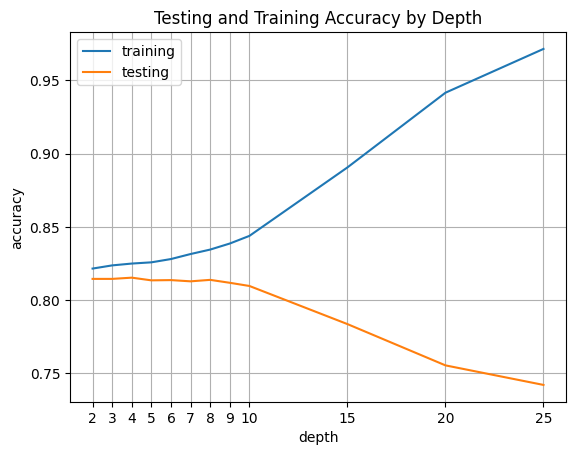

In [27]:
df_accuracy_by_depth.plot(
        title='Testing and Training Accuracy by Depth',
        xticks=depths, xlabel='depth', ylabel='accuracy', grid=True
)

##### Findings
1. We find that as the depths increases our training accuracy increases but our testing accuracy decreases. 
2. It seems that the optimal depth for this model is between 2 and 4. 
3. More tuning and preprocessing may be needed. 

### 3. 
#### K-Nearest neighbor classifier

##### Training our model and collecting accuracy

In [28]:
from sklearn.neighbors import KNeighborsClassifier

k_values = [1, 5, 10, 15, 20, 25]
distance_types = ['euclidean', 'cosine']

accuracies_euclid = []
accuracies_cosine = []

# A cool way to pick the correct list in our for loops when saving accuracies
map_distance_to_list = {
        'euclidean': accuracies_euclid,
        'cosine': accuracies_cosine
}

for distance_type in distance_types:
        print(distance_type)
        for k_value in k_values:
                print(k_value)
                knn_classfier = KNeighborsClassifier(
                        n_neighbors=k_value, metric=distance_type
                )
                
                fitted_model = knn_classfier.fit(train_features, train_labels)
                
                train_accuracy = fitted_model.score(
                        train_features, train_labels
                )
                
                test_accuracy = fitted_model.score(test_features, test_labels)
                
                map_distance_to_list[distance_type].append(
                        (train_accuracy, test_accuracy)
                )
                


euclidean
1
5
10
15
20
25
cosine
1
5
10
15
20
25


##### Transform the dictionaries into dataframes

In [29]:
accuracy_by_depth_euclid = dict(zip(k_values, accuracies_euclid))
df_accuracy_by_depth_euclid = pd.DataFrame().from_dict(
        accuracy_by_depth_euclid,
        orient='index', columns=['training', 'testing']
)

df_accuracy_by_depth_euclid


,training,testing
1,1.000000,0.685833
5,0.816917,0.744500
10,0.796708,0.772667
15,0.790333,0.766667
20,0.788417,0.772333
25,0.786583,0.768833


In [30]:
accuracy_by_depth_cosine = dict(zip(k_values, accuracies_cosine))
df_accuracy_by_depth_cosine = pd.DataFrame().from_dict(
        accuracy_by_depth_cosine,
        orient='index', columns=['training', 'testing']
)

df_accuracy_by_depth_cosine

,training,testing
1,1.000000,0.685667
5,0.819250,0.747333
10,0.796458,0.774667
15,0.794583,0.766500
20,0.789250,0.768833
25,0.788875,0.770667


##### Plotting our accuracies for both distance approximations.

<Axes: title={'center': 'KNN Testing and Training Accuracy by K Value using Euclidean Distance'}, xlabel='K Value', ylabel='accuracy'>

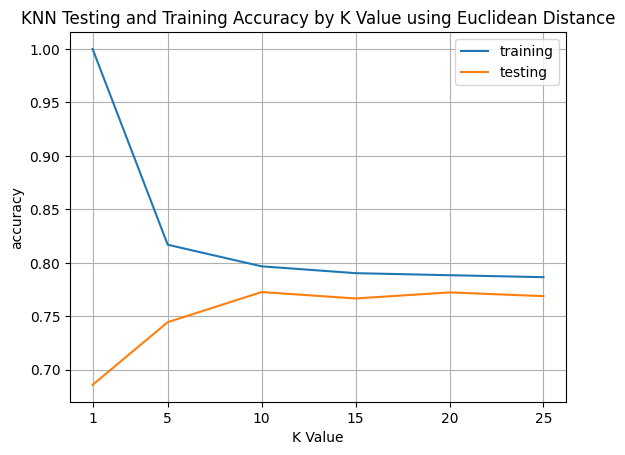

In [31]:
df_accuracy_by_depth_euclid.plot(
        title='KNN Testing and Training Accuracy by K Value using Euclidean Distance',
        xticks=k_values, xlabel='K Value', ylabel='accuracy', grid=True
)

<Axes: title={'center': 'KNN Testing and Training Accuracy by K Value using Cosine Distance'}, xlabel='K Value', ylabel='accuracy'>

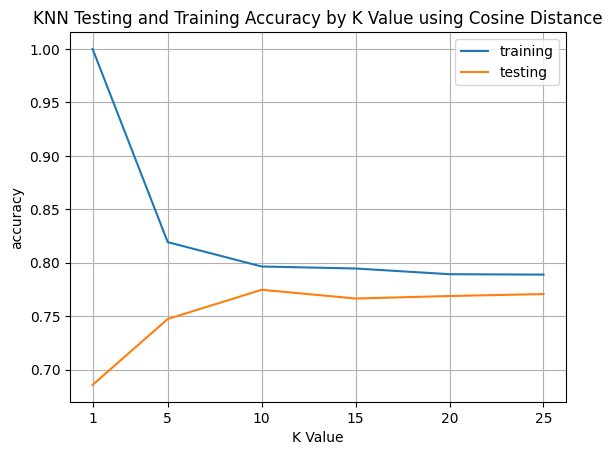

In [32]:
df_accuracy_by_depth_cosine.plot(
        title='KNN Testing and Training Accuracy by K Value using Cosine Distance',
        xticks=k_values, xlabel='K Value', ylabel='accuracy', grid=True
)

### 4.
#### How can we improve the testing accuracy. 
1. The best accuracy was attained when using 20-25 value of K
2. Our data is largely unprocessed
   1. This could mean that some data processing could lead to better results. 
3. Let's try to scale first. 

In [33]:
from sklearn.preprocessing import StandardScaler

# selected_cols = [df_default_credit.columns[i] for i in [1, 5] + list(range(12, 24))]

scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
test_features_scaled = scaler.fit_transform(test_features)

df_default_credit.head(10)


knn_classfier = KNeighborsClassifier(
        n_neighbors=k_value, metric=distance_type
)

fitted_model = knn_classfier.fit(train_features_scaled, train_labels)

train_accuracy = fitted_model.score(
        train_features_scaled, train_labels
)






##### We get a testing accuracy of 0.80 which is a bit higher than the highest accuracy we achieved before. 

1. Other things we could try in the future. 
   1. Principal Component Analysis
   2. Experiment with different train-test ratios.
   3. Remove unnecessary columns

In [34]:
test_accuracy = fitted_model.score(test_features_scaled, test_labels)
train_accuracy = fitted_model.score(train_features_scaled, train_labels)
print("Training Accuracy: ", train_accuracy)
print("Testing Accuracy: ", test_accuracy)

Training Accuracy:  0.8218333333333333
Testing Accuracy:  0.8055
